<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [90]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
mpl.style.use('ggplot') 

In [60]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

Load the dataset into a dataframe.


In [61]:
df = pd.read_csv(URL)

In [62]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [152]:
#need to remove duplicates and null
df_remove= df.drop_duplicates()
boolean = df_remove.duplicated().any()


In [153]:
df_na = df_remove.dropna()

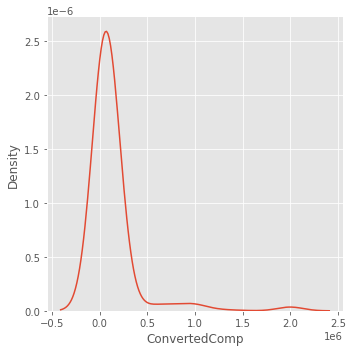

In [154]:
# your code goes here
#Distribution plot function
sns.displot(df_na['ConvertedComp'],kind="kde", bw_adjust=2)

plt.show()

Plot the histogram for the column `ConvertedComp`.


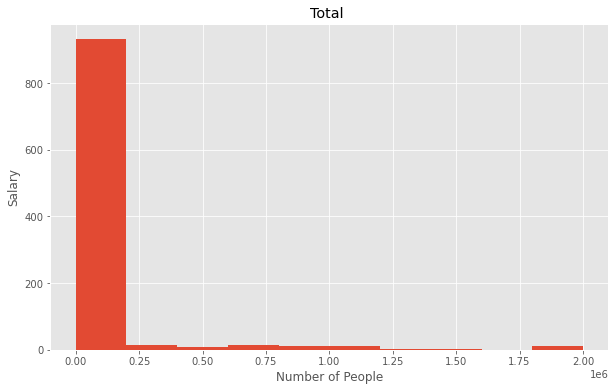

In [103]:
# your code goes here


df_na['ConvertedComp'].plot(kind='hist', figsize=(10, 6))

plt.title('Total ') #don't need this but good for title
plt.ylabel('Salary')#don't need this but good for title
plt.xlabel('Number of People')#don't need this but good for title

plt.show()#don't need this but good for title



What is the median of the column `ConvertedComp`?


In [161]:
# your code goes here
# your code goes here
df['ConvertedComp'].median()


57745.0

How many responders identified themselves only as a **Man**?


In [105]:
# your code goes here
# your code goes here
df_na['Gender'].tolist().count('Man')

962

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [145]:
# your code goes here

#df_na[['ConvertedComp','Gender']].groupby(['Gender']).median()

#df.loc[df['Gender'] == 'Woman', ['ConvertedComp']].median()
# Another option gives you a broad result
#df.groupby('Gender')['ConvertedComp'].median()

ConvertedComp    60000.0
dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [118]:
# your code goes here
df_na['Age'].describe()

count    1008.000000
mean       30.627976
std         6.640693
min        19.000000
25%        26.000000
50%        29.000000
75%        34.000000
max        63.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

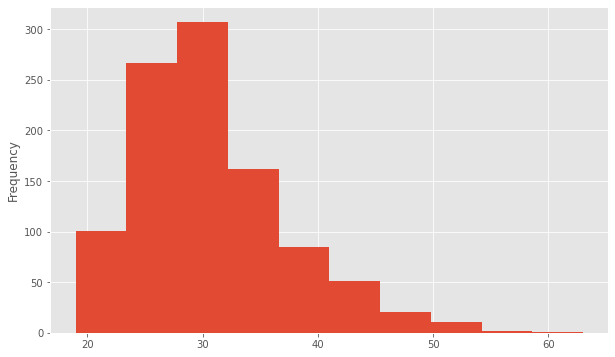

In [120]:
# your code goes here
df_na['Age'].plot(kind='hist', figsize=(10, 6))




## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


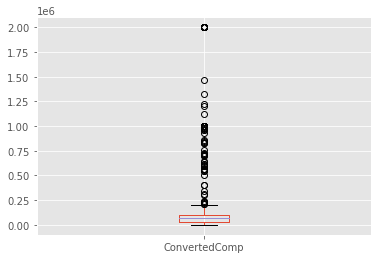

In [136]:
# your code goes here
#Step 1: Get the subset of the dataset using the dataframe

boxplot = df_na.boxplot(column=['ConvertedComp'])



Find out the Inter Quartile Range for the column `ConvertedComp`.


In [135]:
# your code goes here
# your code goes here
# First Quartile
q1 = df_na['ConvertedComp'].quantile(.25)
# Third Quartile
q3 = df_na['ConvertedComp'].quantile(.75)
# Inter Quartile Ratio
iqr=q3-q1
print('Inter Quartile Range:',iqr)


Inter Quartile Range: 70842.5


Find out the upper and lower bounds.


In [131]:
# your code goes here
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

print('lower bounds: ' + str(lower_limit))
print('upper bounds: ' + str(upper_limit))

lower bounds: -82830.0
upper bounds: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [160]:
# your code goes here

[df[(df['ConvertedComp']<upper_limit)].ConvertedComp.describe()] 

[count      9703.000000
 mean      59883.208389
 std       43394.336755
 min           0.000000
 25%       24060.000000
 50%       52704.000000
 75%       85574.500000
 max      209356.000000
 Name: ConvertedComp, dtype: float64]

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [143]:
# your code goes here
df[(df['ConvertedComp'] < lower_limit) | (df['ConvertedComp'] > upper_limit)].ConvertedComp.count()

879

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [144]:
# your code goes here
df_na.corr(method ='pearson')

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.057366,-0.065603,-0.060420,-0.038389,0.027928
CompTotal,-0.057366,1.000000,-0.028490,-0.006841,-0.039165,0.012503
ConvertedComp,-0.065603,-0.028490,1.000000,0.102571,-0.012538,0.109655
WorkWeekHrs,-0.060420,-0.006841,0.102571,1.000000,0.082863,0.040690
CodeRevHrs,-0.038389,-0.039165,-0.012538,0.082863,1.000000,-0.007431
Age,0.027928,0.012503,0.109655,0.040690,-0.007431,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
